In the following program we can see how does the classifier changes when we add more trees. Start with n_estimators = 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier

X, y = make_blobs(centers=[[0, 0], [1, 1]], n_samples=50)

def plot_forest(max_depth=1):
    plt.figure()
    ax = plt.gca()
    h = 0.02

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    if max_depth != 0:
        forest = RandomForestClassifier(n_estimators=3, max_depth=max_depth,
                                        random_state=1).fit(X, y)
        Z = forest.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=.4)
        ax.set_title("max_depth = %d" % max_depth)
    else:
        ax.set_title("data set")
    ax.scatter(X[:, 0], X[:, 1], c=np.array(['b', 'r'])[y], s=60)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


def plot_forest_interactive():
    from IPython.html.widgets import interactive, IntSlider
    slider = IntSlider(min=0, max=8, step=1, value=0)
    return interactive(plot_forest, max_depth=slider)
plot_forest_interactive()

C:\Users\FSU\Anaconda2\envs\ML\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(IntSlider(value=0, description='max_depth', max=8), Output()), _dom_classes=('widget-int…

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot( h,w, maxit=150 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.5:1.5:h*1j, -2:1:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime
divtime = mandelbrot(500,500)
plt.imshow(divtime)
plt.show()

<Figure size 640x480 with 1 Axes>

We reuse the code for creating fractals. We want to train different machine learning algorithms with 1000 random points from the image of the fractal and then we ask the algorithm to assign a color based on their training. 

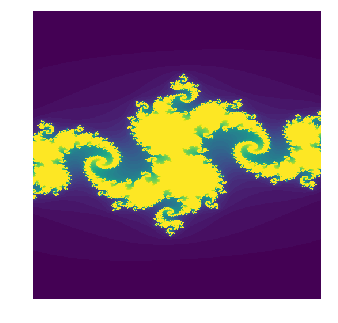

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
h,w, maxit=500,500,50
"""Returns an image of the Mandelbrot fractal of size (h,w)."""
X = np.ones((500,500))
c = (-0.8+0.156*1j)*X
y,x = np.ogrid[ -1.5:1.5:h*1j, -1:1:w*1j ]
z= x+y*1j


divtime = maxit + np.zeros(z.shape, dtype=int)

for i in tqdm_notebook(range(maxit)):
    z = z**2+c 
    diverge = (z)*np.conj(z) > 2**2            # who is diverging
    div_now = diverge & (divtime==maxit)  # who is diverging now
    divtime[div_now] = i                  # note when
    z[diverge] = 2                        # avoid diverging too much


fig = plt.figure()
ax = fig.add_axes([0., 0., 1., 1., ])
# Hide grid lines
ax.grid(False)
ax.axis('off')
# Hide axes ticks
plt.imshow(divtime)


plt.show()

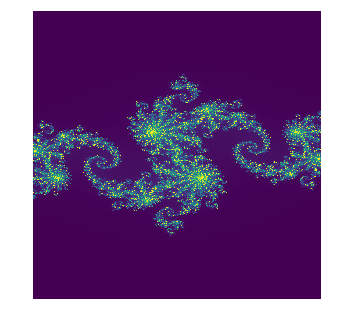

In [37]:
import gc
gc.collect()

18862

In [38]:

points = 1000
equis = np.random.choice(500,points)
uay = np.random.choice(500,points)
val = divtime[equis, uay]

In [39]:
BX=[[equis[i], uay[i]] for i in range(points)]

In [40]:
long = [ [x,y] for x in range(500) for y in range(500)]


In [41]:

# Modified for documentation by ED
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gaussian Process"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear"),
    SVC( C=1),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GaussianProcessClassifier(1.0 * RBF(1.0))]
def thereYouGo(method):#,BX = BX, val=val, long=long,prediction=prediction,classifiers=classifiers):
    method.fit(BX, val) 
    
    prediction = method.predict(long)
    pred= np.array(prediction)
    this=pred.reshape(500,500)
    fig = plt.figure(frameon=False)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    plt.title(method)
    plt.imshow(this)
#    plt.show()
from multiprocessing import Pool
import threading
thread = [None]*10
for i in range(10):
    #print(classifiers[i])
    thread[i] = threading.Thread(target = thereYouGo, args = [classifiers[i]])
    thread[i].start()
    #print(i)

C:\Users\FSU\Anaconda2\envs\ML\lib\site-packages\sklearn\externals\joblib\parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
C:\Users\FSU\Anaconda2\envs\ML\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
Exception in thread Thread-43:
Traceback (most recent call last):
  File "C:\Users\FSU\Anaconda2\envs\ML\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\FSU\Anaconda2\envs\ML\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-41-75b21f3f4908>", line 39, in thereYouGo
    method.fit(BX, val)
  File "C:\Users\FSU\Anaconda2\envs\ML\lib\site-packages\sklearn\discriminant_analysis.py", line 676, in fit
    'is ill defined.' % str(self.classes_[ind]))
ValueError: y has only 1 sample in class 26, covariance is ill defined.



13

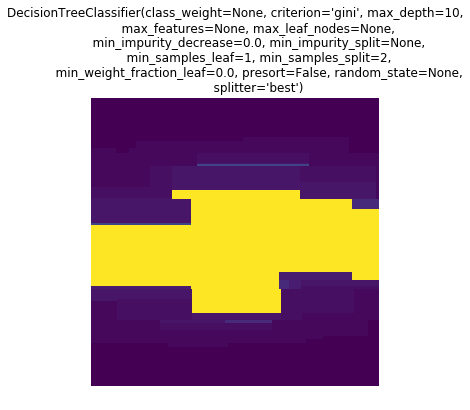

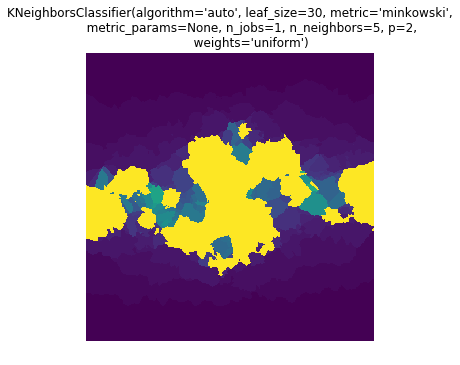

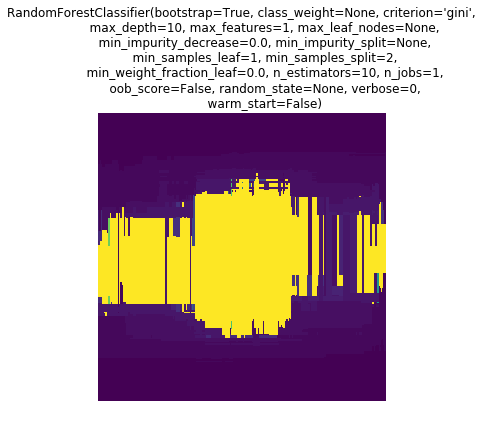

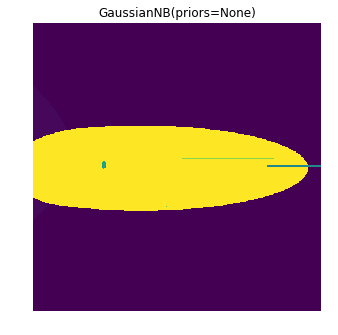

In [42]:
threading.active_count()

12

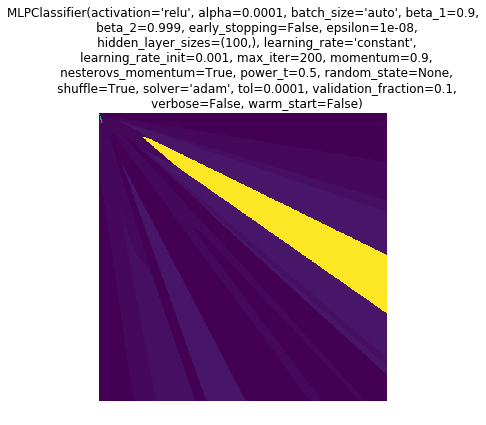

In [43]:
threading.active_count()


8

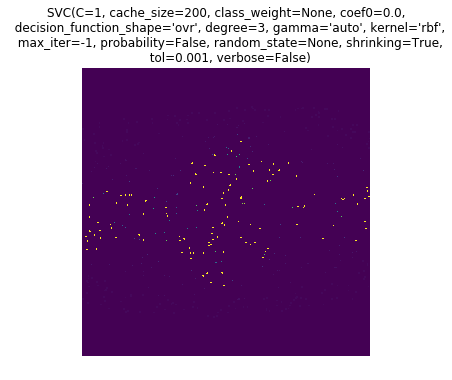

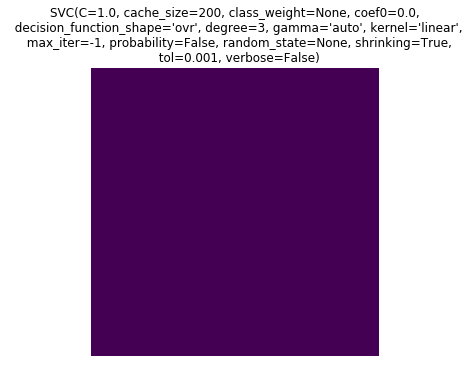

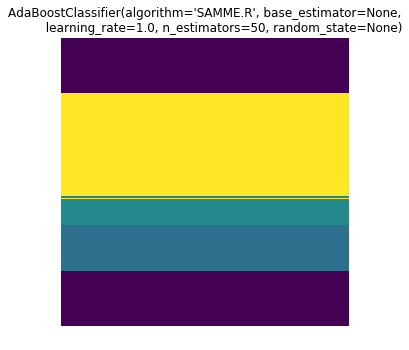

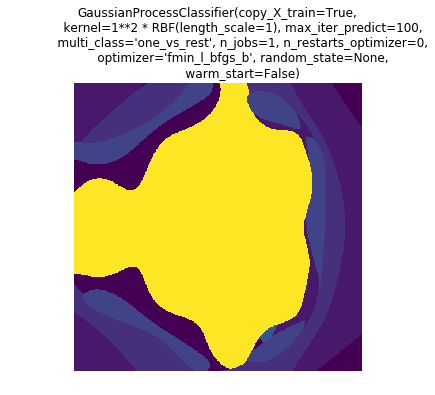

In [45]:
threading.active_count()

In [48]:
threading.active_count()

8

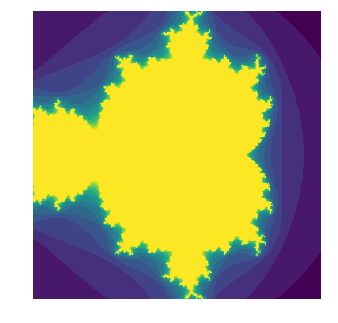

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
h,w, maxit=500,500,15
"""Returns an image of the Mandelbrot fractal of size (h,w)."""
y,x = np.ogrid[ -1:1:h*1j, -1.2:.8:w*1j ]
z= x+y*1j
c = z

divtime = maxit + np.zeros(z.shape, dtype=int)

for i in tqdm_notebook(range(maxit)):
    z = z**2+c 
    diverge = (z)*np.conj(z) > 2**2            # who is diverging
    div_now = diverge & (divtime==maxit)  # who is diverging now
    divtime[div_now] = i                  # note when
    z[diverge] = 2                        # avoid diverging too much


fig = plt.figure()
ax = fig.add_axes([0., 0., 1., 1., ])
# Hide grid lines
ax.grid(False)
ax.axis('off')
# Hide axes ticks
plt.imshow(divtime)


plt.show()

In [25]:
import gc
gc.collect()

18846

In [26]:

points = 1000
equis = np.random.choice(500,points)
uay = np.random.choice(500,points)
val = divtime[equis, uay]

In [27]:
BX=[[equis[i], uay[i]] for i in range(points)]

In [28]:
long = [ [x,y] for x in range(500) for y in range(500)]


In [29]:

# Modified for documentation by ED
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gaussian Process"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear"),
    SVC( C=1),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GaussianProcessClassifier(1.0 * RBF(1.0))]
def thereYouGo(method):#,BX = BX, val=val, long=long,prediction=prediction,classifiers=classifiers):
    method.fit(BX, val) 
    
    prediction = method.predict(long)
    pred= np.array(prediction)
    this=pred.reshape(500,500)
    fig = plt.figure(frameon=False)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    plt.title(method)
    plt.imshow(this)
#    plt.show()
from multiprocessing import Pool
import threading
thread = [None]*10
for i in range(10):
    #print(classifiers[i])
    thread[i] = threading.Thread(target = thereYouGo, args = [classifiers[i]])
    thread[i].start()
    #print(i)

C:\Users\FSU\Anaconda2\envs\ML\lib\site-packages\sklearn\externals\joblib\parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
C:\Users\FSU\Anaconda2\envs\ML\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


8

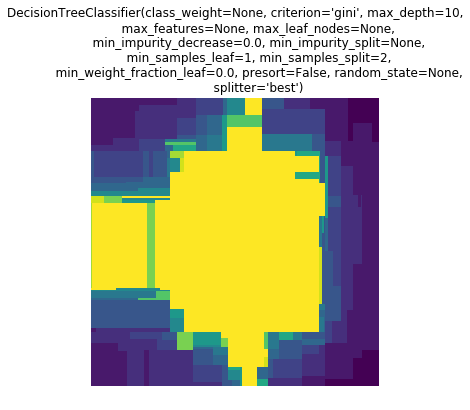

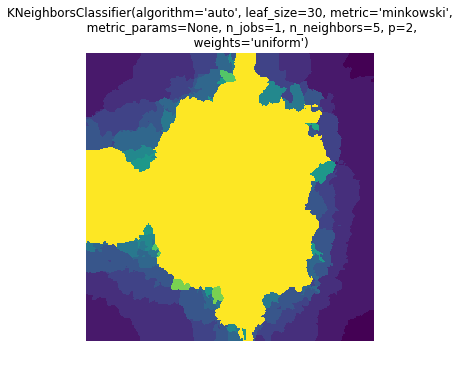

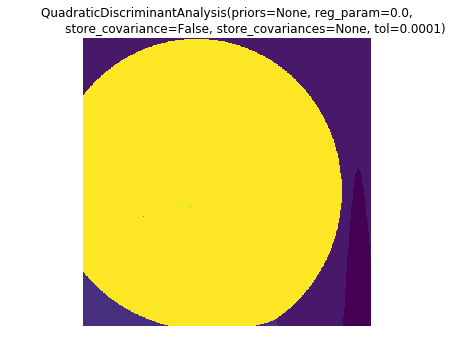

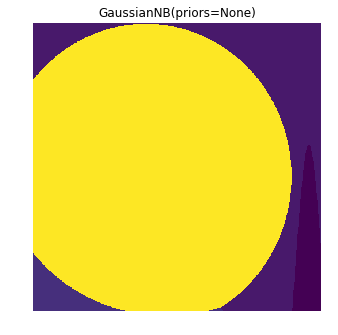

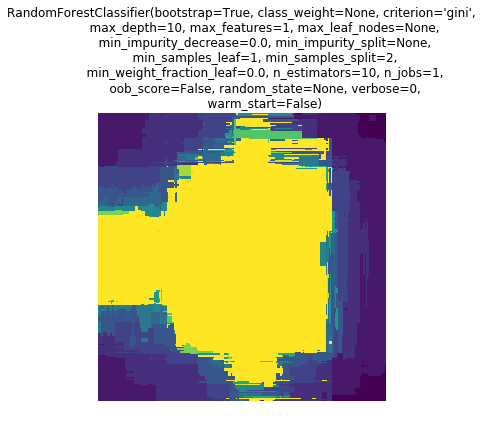

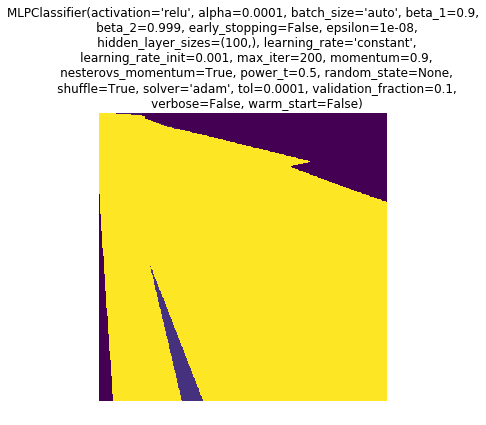

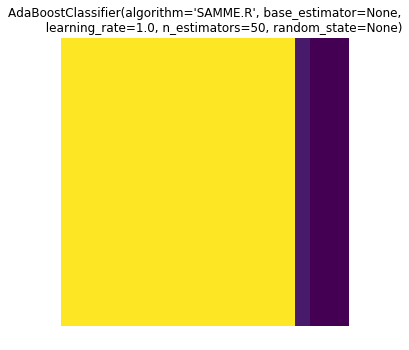

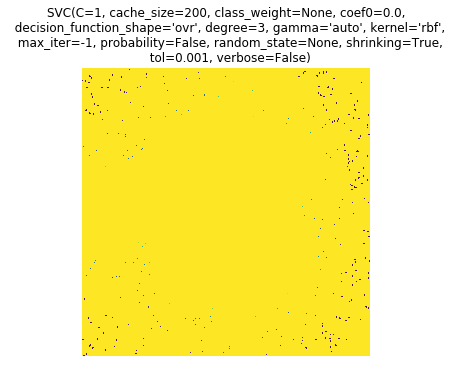

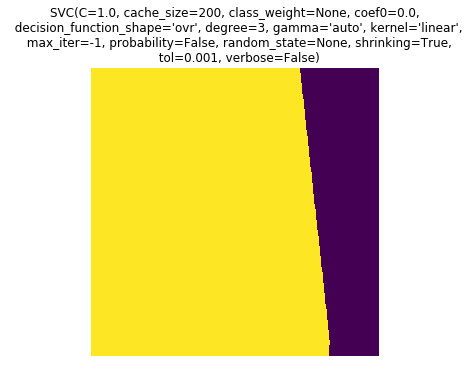

In [30]:
threading.active_count()

In [35]:
threading.active_count()


8